## Load Data

In [1]:
# Load the Excel file data in sheet number 2 using pandas
import pandas as pd
pd.set_option("display.max_columns", None)

# Load the Excel file data in sheet number 2 using pandas, use the first row as the column names
df = pd.read_excel("Case Study for Data Scientist.xlsx", sheet_name="Sheet1", header=0)
df.head()

,Day,Date,Region,Mill Code,Mill Type,Actual OER %,Crop Freshness Score,Ripe %,Long Stalk %,Rat Damage %,Loose Fruits %,Rainfall (mm),Age Profile (years),Total Oil Losses %,Downtime %,FFB Processed (MT),Seed A %,Seed B %,Other Seeds %,Coastal %,Inland %
0,Wed,2020-01-01,R01,Z001,IP,0.00,300.000000,95.157670,1.241942,4.734563,6.833731,0.000000,15.721261,0.000000,0.000000,0.000,31.114312,0.0,68.885688,49.290868,50.709132
1,Thu,2020-01-02,R01,Z001,IP,22.27,289.458286,95.430159,1.859710,3.931418,7.475889,3.342912,13.950932,1.387521,0.254744,648.373,39.927122,0.0,60.072878,46.188086,53.811914
2,Fri,2020-01-03,R01,Z001,IP,22.55,262.890977,94.617481,1.514098,3.568296,7.416632,24.355107,13.322048,1.484348,0.058243,530.021,37.392953,0.0,62.607047,45.361864,54.638136
3,Sat,2020-01-04,R01,Z001,IP,22.12,262.653835,95.404031,1.457055,4.809152,7.225248,1.208765,14.120394,1.364690,0.099324,702.527,33.681927,0.0,66.318073,51.698756,48.301244
4,Sun,2020-01-05,R01,Z001,IP,0.00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000,NaN,NaN,NaN,NaN,NaN


In [2]:
print(df.columns)
print(len(df.columns))
print(df.dtypes)

Index(['Day', 'Date', 'Region', 'Mill Code', 'Mill Type', 'Actual OER %',
       'Crop Freshness Score', 'Ripe %', 'Long Stalk %', 'Rat Damage %',
       'Loose Fruits %', 'Rainfall (mm)', 'Age Profile (years)',
       'Total Oil Losses %', 'Downtime %', 'FFB Processed (MT)', 'Seed A %',
       'Seed B %', 'Other Seeds %', 'Coastal %', 'Inland %'],
      dtype='object')
21
Day                             object
Date                    datetime64[ns]
Region                          object
Mill Code                       object
Mill Type                       object
Actual OER %                   float64
Crop Freshness Score           float64
Ripe %                         float64
Long Stalk %                   float64
Rat Damage %                   float64
Loose Fruits %                 float64
Rainfall (mm)                  float64
Age Profile (years)            float64
Total Oil Losses %             float64
Downtime %                     float64
FFB Processed (MT)             float64


Day                      0.000000
Date                     0.000000
Region                   0.000000
Mill Code                0.000000
Mill Type                0.000000
Actual OER %             0.054856
Crop Freshness Score    17.178652
Ripe %                  17.178652
Long Stalk %            17.178652
Rat Damage %            17.178652
Loose Fruits %           3.125000
Rainfall (mm)           17.178652
Age Profile (years)     16.895527
Total Oil Losses %       0.000000
Downtime %               0.081399
FFB Processed (MT)       0.054856
Seed A %                16.534541
Seed B %                16.534541
Other Seeds %           16.534541
Coastal %               16.534541
Inland %                16.534541
dtype: float64


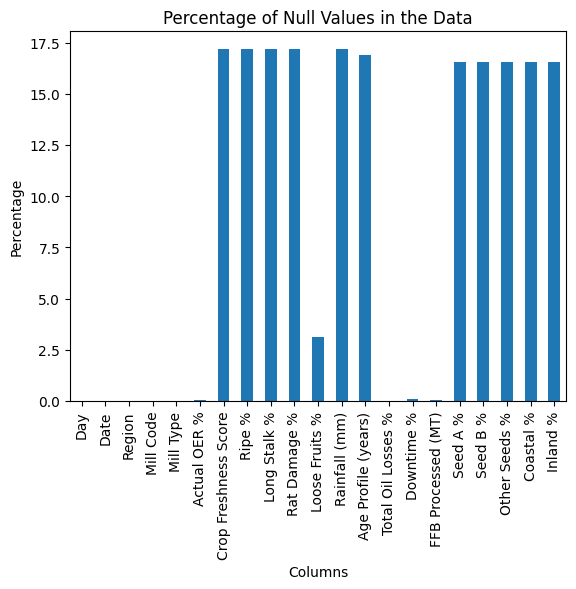

Day                        0
Date                       0
Region                     0
Mill Code                  0
Mill Type                  0
Actual OER %              31
Crop Freshness Score    9708
Ripe %                  9708
Long Stalk %            9708
Rat Damage %            9708
Loose Fruits %          1766
Rainfall (mm)           9708
Age Profile (years)     9548
Total Oil Losses %         0
Downtime %                46
FFB Processed (MT)        31
Seed A %                9344
Seed B %                9344
Other Seeds %           9344
Coastal %               9344
Inland %                9344
dtype: int64


In [3]:

# Calculate the percentage of null values in the data
null_values = df.isnull().sum()
total_values = df.isnull().count()
percentage_null_values = (null_values/total_values) * 100
print(percentage_null_values)

# Plot the percentage null values in the data using a bar chart
import matplotlib.pyplot as plt
percentage_null_values.plot(kind="bar")
plt.title("Percentage of Null Values in the Data")
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.show()
# Check the null values in the data
print(df.isnull().sum())

In [4]:
# Remove the null values from the data
df = df.dropna()
print(df.isnull().sum())

Day                     0
Date                    0
Region                  0
Mill Code               0
Mill Type               0
Actual OER %            0
Crop Freshness Score    0
Ripe %                  0
Long Stalk %            0
Rat Damage %            0
Loose Fruits %          0
Rainfall (mm)           0
Age Profile (years)     0
Total Oil Losses %      0
Downtime %              0
FFB Processed (MT)      0
Seed A %                0
Seed B %                0
Other Seeds %           0
Coastal %               0
Inland %                0
dtype: int64


In [5]:
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)
print(len(categorical_features))

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('Actual OER %')
print(numerical_features)
print(len(numerical_features))

label = 'Actual OER %'


Index(['Day', 'Region', 'Mill Code', 'Mill Type'], dtype='object')
4
Index(['Crop Freshness Score', 'Ripe %', 'Long Stalk %', 'Rat Damage %',
       'Loose Fruits %', 'Rainfall (mm)', 'Age Profile (years)',
       'Total Oil Losses %', 'Downtime %', 'FFB Processed (MT)', 'Seed A %',
       'Seed B %', 'Other Seeds %', 'Coastal %', 'Inland %'],
      dtype='object')
15


## Numerical Features Analysis

### Correlation between numerical features and target

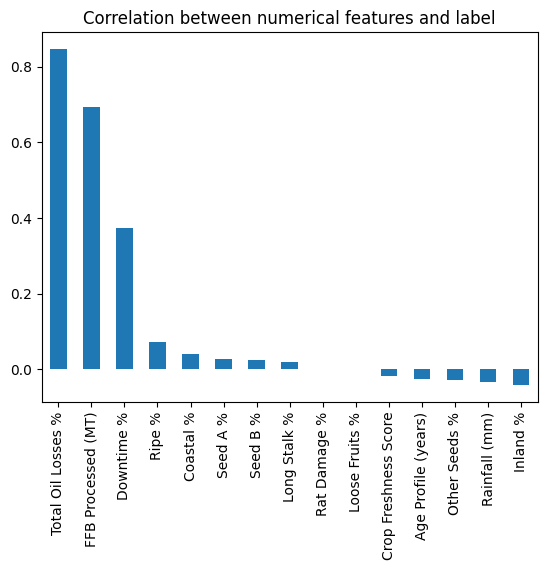

Total Oil Losses %      0.846746
FFB Processed (MT)      0.694093
Downtime %              0.374516
Ripe %                  0.071436
Coastal %               0.041078
Seed A %                0.026728
Seed B %                0.025048
Long Stalk %            0.018956
Rat Damage %            0.001405
Loose Fruits %         -0.000212
Crop Freshness Score   -0.017319
Age Profile (years)    -0.025450
Other Seeds %          -0.029374
Rainfall (mm)          -0.033834
Inland %               -0.041202
dtype: float64


In [6]:
# perform correlation between numerical Features and Label
correlation = df[numerical_features].corrwith(df[label]).sort_values(ascending=False)

# plot a bar chart to show the correlation
import matplotlib.pyplot as plt
correlation.plot(kind='bar')
plt.title("Correlation between numerical features and label")
plt.show()


print(correlation)



### Correlation of Numerical Features and Target

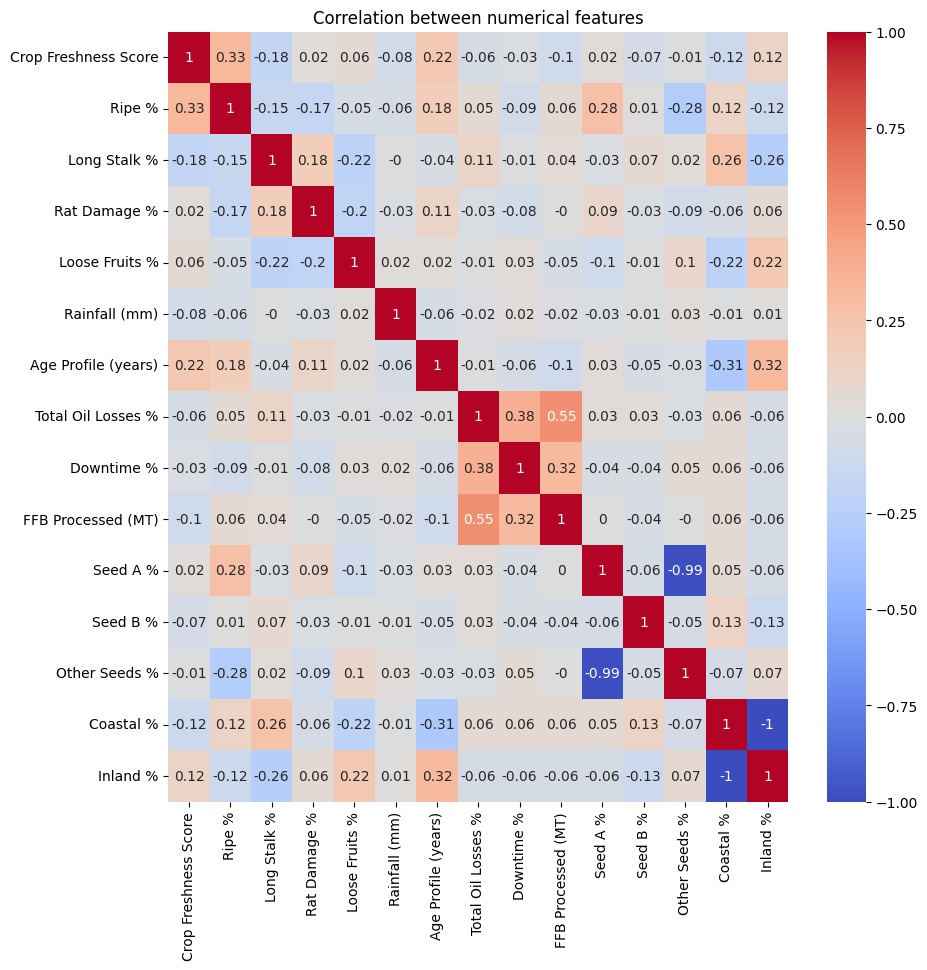

In [7]:
# Correlation between numerical features and plot a heatmap
import seaborn as sns
correlation_matrix = df[numerical_features].corr()
# round the correlation values to 2 decimal places
correlation_matrix = correlation_matrix.round(2)

# on the heatmap, highlight the correlation values that are greater than 0.5
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation between numerical features")
plt.show()


## Categorical Variables Analysis

### Working Day Analysis

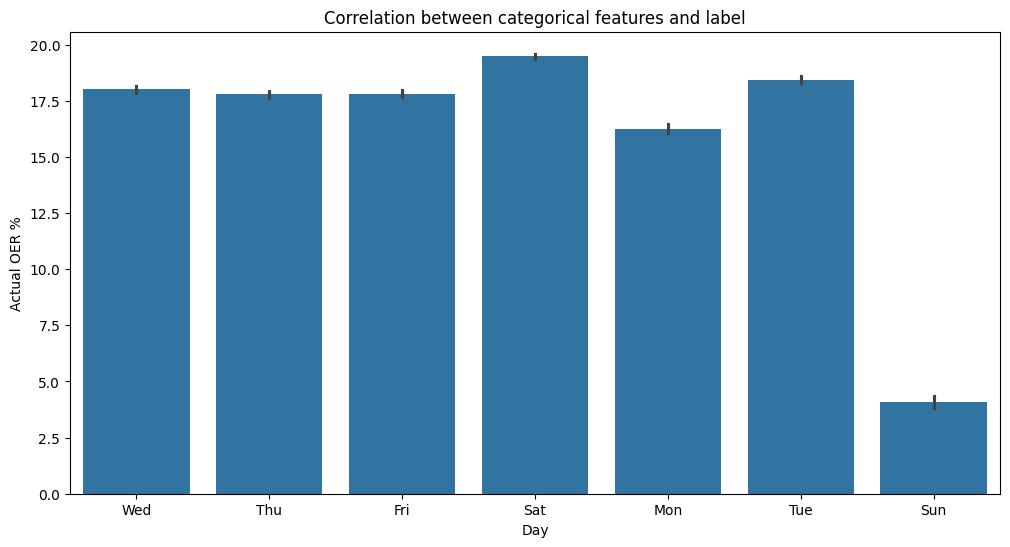

In [8]:
# Plot a bar chart to show the correlation between the categorical features and the label
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x=df[categorical_features[0]], y=label, data=df)
plt.title("Correlation between categorical features and label")
plt.show()

## Year-By-Year Analysis

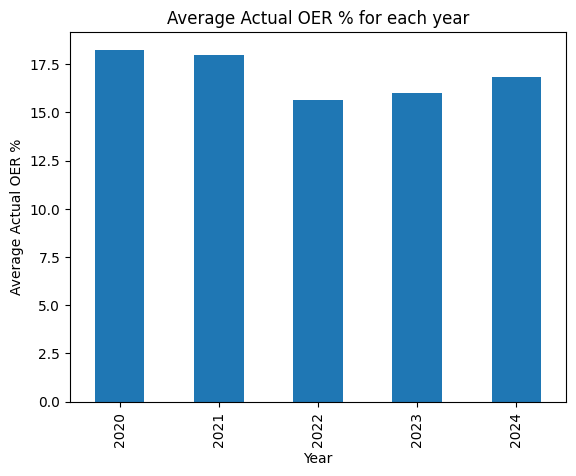

In [9]:
df2 = df.copy()
# set the index of the data to the 'Date' column
df2.set_index('Date', inplace=True)

# extract the year, month, and day from the 'Date' column
df2['Year'] = df2.index.year
df2['Month'] = df2.index.month
df2['Day'] = df2.index.day

df2.head()

# Group the data by the 'Year' column and calculate the mean of the 'Actual OER %' column
yearly_data = df2.groupby('Year')['Actual OER %'].mean()

# Plot a bar chart to show the average 'Actual OER %' for each year
yearly_data.plot(kind='bar')
plt.title("Average Actual OER % for each year")
plt.xlabel("Year")
plt.ylabel("Average Actual OER %")
plt.show()


### Regional Analysis

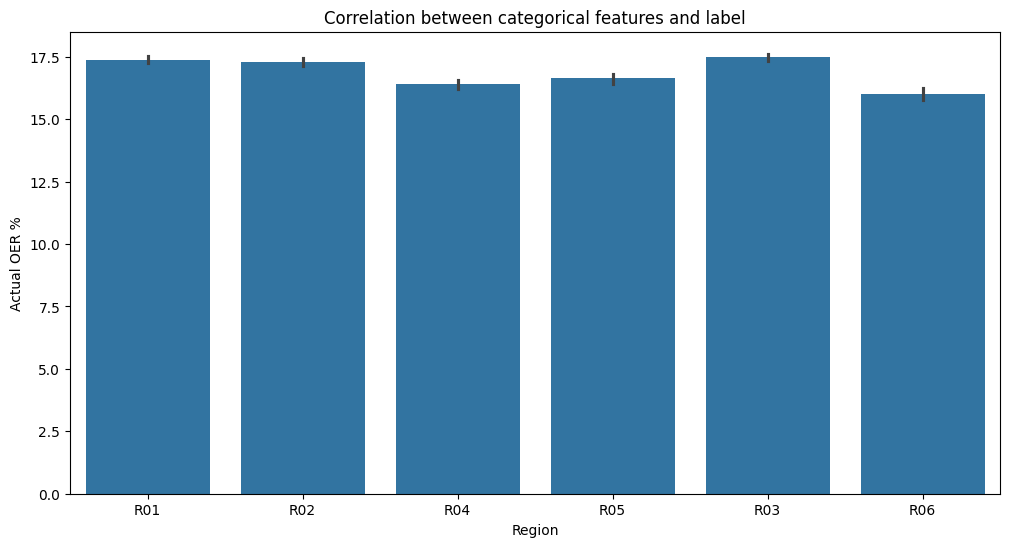

In [10]:
# Plot a bar chart to show the correlation between the categorical features and the label
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=df[categorical_features[1]], y=label, data=df)
plt.title("Correlation between categorical features and label")
plt.show()

### Mill Analysis

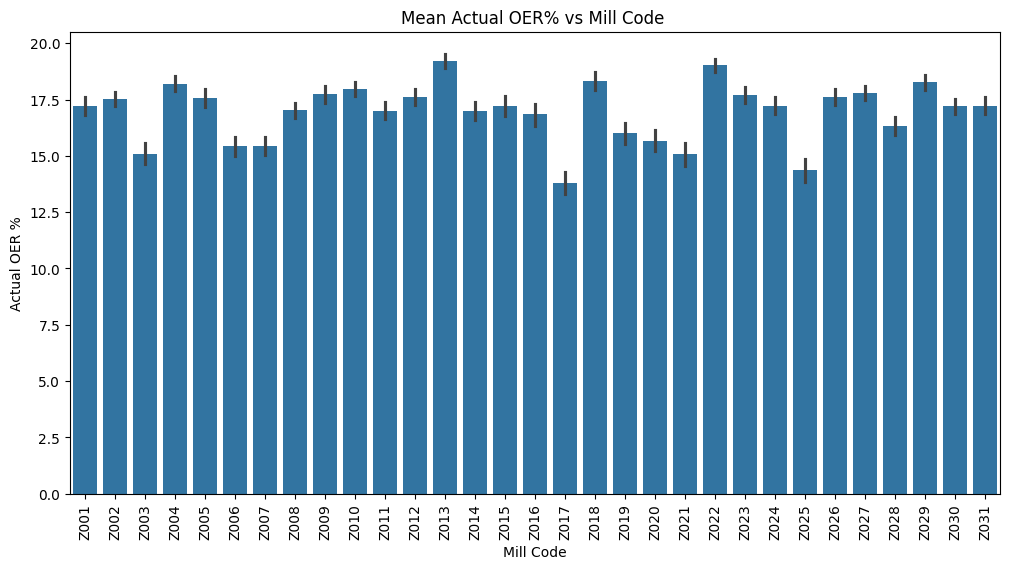

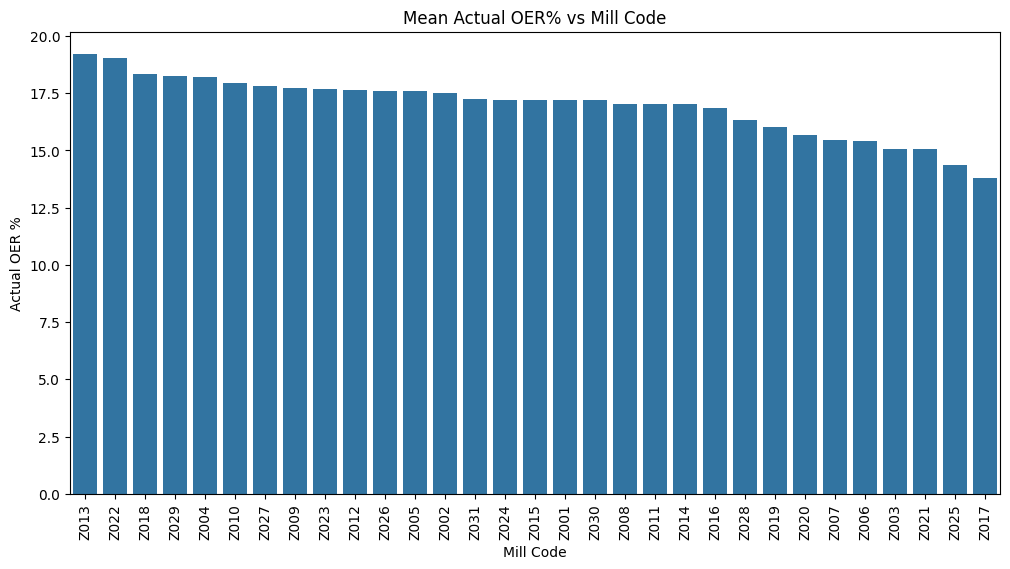

In [11]:
import seaborn as sns
# plot a bar chart to show the average actual OER % for each mill code, in descending order
plt.figure(figsize=(12, 6))
sns.barplot(x=df[categorical_features[2]], y=df[label], data=df)
plt.title(f"Mean Actual OER% vs {categorical_features[2]} ")
plt.xticks(rotation=90)
plt.show()

df_mill_code = df[['Mill Code', 'Actual OER %']]
# group by the mill code and calculate the average of the actual OER %
df_mill_code = df_mill_code.groupby('Mill Code').mean().sort_values(by='Actual OER %', ascending=False)

# plot a bar chart to show the average actual OER % for each mill code, in descending order
plt.figure(figsize=(12, 6))
sns.barplot(x=df_mill_code.index, y='Actual OER %', data=df_mill_code)
plt.title("Mean Actual OER% vs Mill Code")
plt.xticks(rotation=90)
plt.show()

[<BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 artists>, <BarContainer object of 6 a

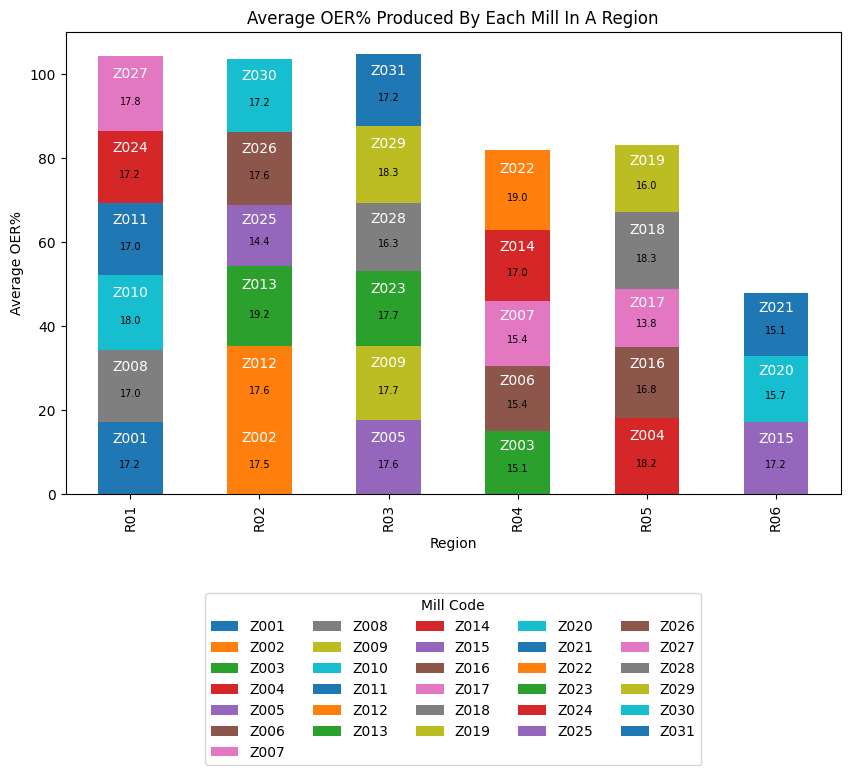

Mill Code,Z001,Z002,Z003,Z004,Z005,Z006,Z007,Z008,Z009,Z010,Z011,Z012,Z013,Z014,Z015,Z016,Z017,Z018,Z019,Z020,Z021,Z022,Z023,Z024,Z025,Z026,Z027,Z028,Z029,Z030,Z031
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
R01,17.215155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.015989,0.000000,17.966347,17.009351,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,17.224691,0.000000,0.000000,17.795157,0.000000,0.000000,0.000000,0.000000
R02,0.000000,17.516815,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.632418,19.225292,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,14.368818,17.610804,0.000000,0.000000,0.000000,17.201536,0.000000
R03,0.000000,0.000000,0.000000,0.000000,17.584061,0.000000,0.000000,0.000000,17.740063,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,17.698849,0.000000,0.000000,0.000000,0.000000,16.325651,18.261593,0.000000,17.227976
R04,0.000000,0.000000,15.083363,0.000000,0.000000,15.430914,15.434321,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.009178,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,19.025019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R05,0.000000,0.000000,0.000000,18.207937,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,16.843396,13.790931,18.323628,16.001729,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
# Group by Region and Mill Code and calculate the mean of the Actual OER %
grouped_by_region_millcode = df.groupby(['Region', 'Mill Code'])['Actual OER %'].mean()
grouped_by_region_millcode.head(50)

# convert the grouped data to a dataframe
df3 = grouped_by_region_millcode.reset_index()

# Reshape data for stacked bar chart
stacked_data = df3.pivot(index="Region", columns="Mill Code", values="Actual OER %").fillna(0)

# Plot stacked bar chart
ax = stacked_data.plot(kind="bar", stacked=True, figsize=(10, 6))
print(ax.containers)


# Annotate values on each segment of the bar
for i, bars in enumerate(ax.containers):
    for bar in bars:
        # Get the height of the bar
        height = bar.get_height()
        if height > 0:  # Annotate only non-zero values
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X position
                bar.get_y() + height / 1.3,  # Y position (center of the segment)
                # include the mill code in the text
                f"{stacked_data.columns[i]}",  # Text to display
                ha="center",
                va="center",
                fontsize=10,
                color="white",
            )
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X position
                bar.get_y() + height / 2.5,  # Y position (center of the segment)
                f"{height:.1f}",  # Text to display
                # include the mill code in the text
                #f"{stacked_data.columns[i]}",  # Text to display
                ha="center",
                va="center",
                fontsize=7,
                color="black",
            )

# Customize the legend to make it horizontal
plt.legend(
    title="Mill Code",
    ncol=5,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.2),
)

# Customize the chart
plt.title("Average OER% Produced By Each Mill In A Region")
#plt.xlabel("Mill Code")
plt.ylabel("Average OER%")
# plt.tight_layout()

# Show the plot
plt.show()
stacked_data.head()

### Mill Type Analysis

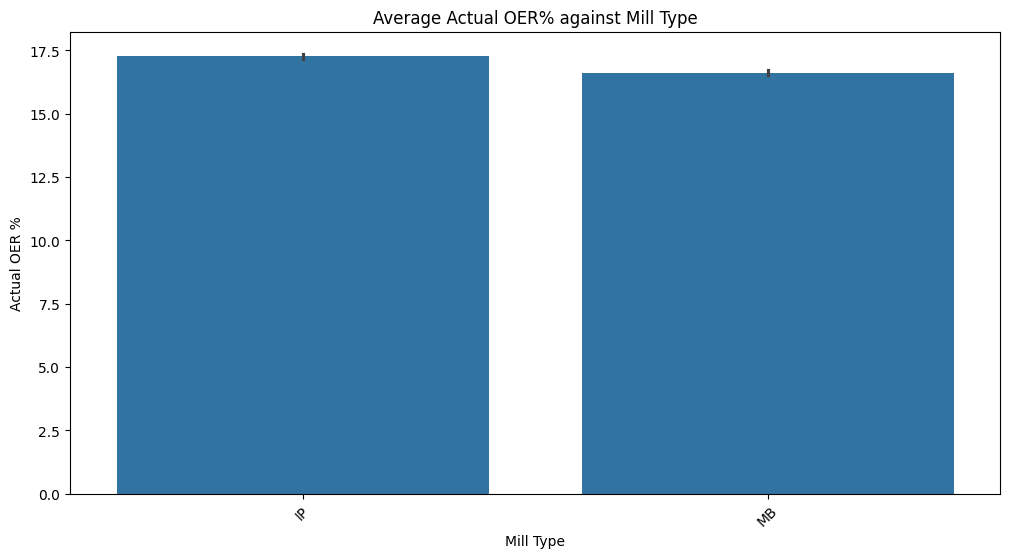

           Actual OER %
Mill Type              
IP            17.270815
MB            16.618094


In [13]:
# Plot a bar chart to show the correlation between the categorical features and the label
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=df[categorical_features[3]], y=label, data=df)
plt.title(f"Average Actual OER% against {categorical_features[3]}")
plt.xticks(rotation=45)
plt.show()

# print the average of the Actual OER % for each mill type
df_temp = df[[categorical_features[3], 'Actual OER %']]
df_temp = df_temp.groupby('Mill Type').mean().sort_values(by='Actual OER %', ascending=False)
print(df_temp)
